In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_lib 
from CVAE import cvae_trainer, models

In [3]:
def preproc(x):
    return x > 0

In [4]:
hparams = tf.contrib.training.HParams(
    num_val=None,
    num_labels=None,
    batch_size=64,
    latent_dim=200,
    debug=True,
    log_dir='logs',
    experiment_name='test_prior_complete',
    condition_size=(10,),
    target_size=(28, 28),
    num_hidden=1000,
    epochs=20,
    lr=1e-3,
    log_freq=20,
    preproc=preproc,
)

In [5]:
train_data, val_data, test_data = tf_lib.loaders.load_mnist(**hparams.values())

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


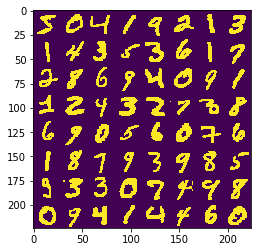

In [6]:
image = tf_lib.utils.visualize_images(train_data[0][:64] * 255)
plt.imshow(image)

In [7]:
model = {
    'prior_net': models.PriorNetwork(hparams),
    'posterior_net': models.PosteriorNetwork(hparams),
    'generator_net': models.GenerationNetwork(hparams),
}

W0816 16:37:11.835930 4518753728 deprecation.py:506] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
session = tf.Session()
trainer = cvae_trainer.CVAE(session, model, hparams, tf_lib.loaders.load_mnist)

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


W0816 16:37:13.847770 4518753728 deprecation.py:323] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
trainer.train()

  0%|          | 0/938 [00:00<?, ?it/s]

 [*] Reading checkpoints from logs/test_prior_complete
Loading and saving variables ... 
---------
Variables: name (type shape) [size]
---------
prior_network/dense/kernel:0 (float32 10x1000) [10000, bytes: 40000]
prior_network/dense/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_1/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
prior_network/dense_1/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_2/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_2/bias:0 (float32 200) [200, bytes: 800]
prior_network/dense_3/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_3/bias:0 (float32 200) [200, bytes: 800]
posterior_network/dense_4/kernel:0 (float32 794x1000) [794000, bytes: 3176000]
posterior_network/dense_4/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network/dense_5/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
posterior_network/dense_5/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network

100%|██████████| 938/938 [00:27<00:00, 34.67it/s, kl=16.3, loss=118, nll=101] 


[*] Epoch 1/20 completed


  0%|          | 4/938 [00:00<00:26, 34.95it/s, kl=18.4, loss=120, nll=102] 

[*] Evaluated Loss:113.16267944141558, KL:16.90201567388644, NLL: 96.26066385257016
[*] Posterior Mu 0.023324890062212944, Logv -0.547248363494873
[*] Prior Mu 0.025234859436750412, Logv -0.3744819760322571


100%|██████████| 938/938 [00:28<00:00, 32.92it/s, kl=17.3, loss=84.5, nll=67.2]


[*] Epoch 2/20 completed


  1%|          | 5/938 [00:00<00:35, 26.48it/s, kl=18.7, loss=98.6, nll=79.9]

[*] Evaluated Loss:97.67997736839732, KL:18.283827799900322, NLL: 79.39614858445088
[*] Posterior Mu 0.01607530191540718, Logv -0.7664132714271545
[*] Prior Mu 0.023130111396312714, Logv -0.5955917835235596


100%|██████████| 938/938 [00:29<00:00, 31.89it/s, kl=18.8, loss=93.6, nll=74.8]


[*] Epoch 3/20 completed


  1%|          | 5/938 [00:00<00:34, 26.97it/s, kl=19, loss=91.4, nll=72.4]  

[*] Evaluated Loss:90.07277164337741, KL:19.362939652363966, NLL: 70.70983233117754
[*] Posterior Mu 0.011009549722075462, Logv -0.9486100673675537
[*] Prior Mu 0.020564043894410133, Logv -0.7603960633277893


100%|██████████| 938/938 [00:28<00:00, 33.25it/s, kl=20.1, loss=93.8, nll=73.8]


[*] Epoch 4/20 completed


  1%|          | 6/938 [00:00<00:28, 32.24it/s, kl=20.2, loss=84.7, nll=64.6]

[*] Evaluated Loss:85.926446951119, KL:19.67294973628536, NLL: 66.25349669243879
[*] Posterior Mu 0.011530802585184574, Logv -1.1551432609558105
[*] Prior Mu 0.009744242765009403, Logv -0.9462937712669373


100%|██████████| 938/938 [00:27<00:00, 34.38it/s, kl=20.2, loss=76.6, nll=56.4]


[*] Epoch 5/20 completed


  1%|          | 6/938 [00:00<00:26, 35.06it/s, kl=20.8, loss=80.7, nll=59.9]

[*] Evaluated Loss:82.81389005624564, KL:20.455050122206377, NLL: 62.35883921726494
[*] Posterior Mu -0.015390788204967976, Logv -1.3064156770706177
[*] Prior Mu -0.0005645448109135032, Logv -1.1068309545516968


100%|██████████| 938/938 [00:27<00:00, 34.68it/s, kl=19.7, loss=73.7, nll=54.1]


[*] Epoch 6/20 completed


  1%|          | 6/938 [00:00<00:27, 33.87it/s, kl=20.9, loss=79.4, nll=58.5]

[*] Evaluated Loss:81.65965970762217, KL:20.277898460436777, NLL: 61.38176149015973
[*] Posterior Mu -0.012952527031302452, Logv -1.4286004304885864
[*] Prior Mu -0.009601945988833904, Logv -1.229164719581604


100%|██████████| 938/938 [00:27<00:00, 34.08it/s, kl=21.5, loss=75.8, nll=54.3]


[*] Epoch 7/20 completed


  1%|          | 6/938 [00:00<00:29, 32.09it/s, kl=21.1, loss=76.5, nll=55.3]

[*] Evaluated Loss:80.74175573458338, KL:21.309619417615757, NLL: 59.432136146885576
[*] Posterior Mu -0.0046636187471449375, Logv -1.6199039220809937
[*] Prior Mu 0.0016110904980450869, Logv -1.3837738037109375


100%|██████████| 938/938 [00:27<00:00, 29.63it/s, kl=20.6, loss=78.7, nll=58.1]


[*] Epoch 8/20 completed


  1%|          | 6/938 [00:00<00:30, 30.97it/s, kl=20.9, loss=80.4, nll=59.5]

[*] Evaluated Loss:79.54527860993792, KL:21.259257492745757, NLL: 58.28602106859729
[*] Posterior Mu 0.005478267557919025, Logv -1.689117431640625
[*] Prior Mu -0.004253048915416002, Logv -1.469315528869629


100%|██████████| 938/938 [00:28<00:00, 32.79it/s, kl=21.9, loss=77.8, nll=55.9]


[*] Epoch 9/20 completed


  1%|          | 6/938 [00:00<00:27, 34.08it/s, kl=21.2, loss=72.9, nll=51.7]

[*] Evaluated Loss:79.20253330886743, KL:20.975154257124398, NLL: 58.2273792339738
[*] Posterior Mu -0.008857092820107937, Logv -1.8480734825134277
[*] Prior Mu -0.007868221029639244, Logv -1.6168479919433594


100%|██████████| 938/938 [00:27<00:00, 34.34it/s, kl=19.5, loss=70.5, nll=50.9]


[*] Epoch 10/20 completed


  0%|          | 4/938 [00:00<00:37, 25.08it/s, kl=20.7, loss=69.6, nll=48.8]

[*] Evaluated Loss:79.13071815830887, KL:21.459543969221176, NLL: 57.67117426198
[*] Posterior Mu -0.024119382724165916, Logv -1.8984348773956299
[*] Prior Mu -0.019068755209445953, Logv -1.7034063339233398


100%|██████████| 938/938 [00:29<00:00, 35.35it/s, kl=22.1, loss=81.8, nll=59.7]


[*] Epoch 11/20 completed


  1%|          | 6/938 [00:00<00:26, 35.05it/s, kl=21.8, loss=73.9, nll=52]  

[*] Evaluated Loss:78.3273908287097, KL:21.7703008712477, NLL: 56.55709015184147
[*] Posterior Mu -0.0028499739710241556, Logv -1.990828037261963
[*] Prior Mu -0.004521077498793602, Logv -1.7829291820526123


100%|██████████| 938/938 [00:26<00:00, 35.09it/s, kl=21.6, loss=73.6, nll=52]  


[*] Epoch 12/20 completed


  1%|          | 6/938 [00:00<00:27, 34.12it/s, kl=21.6, loss=71.5, nll=49.8]

[*] Evaluated Loss:77.63948224304588, KL:21.88509451507763, NLL: 55.75438814102464
[*] Posterior Mu -0.007118344306945801, Logv -2.093630313873291
[*] Prior Mu -0.01582171581685543, Logv -1.8805477619171143


100%|██████████| 938/938 [00:26<00:00, 35.09it/s, kl=22.5, loss=77.3, nll=54.9]


[*] Epoch 13/20 completed


  1%|          | 7/938 [00:00<00:25, 35.86it/s, kl=22, loss=76.5, nll=54.5]  

[*] Evaluated Loss:77.4627407098272, KL:22.389885944925297, NLL: 55.07285515366087
[*] Posterior Mu -0.007491338066756725, Logv -2.151923418045044
[*] Prior Mu -0.009742450900375843, Logv -1.9359726905822754


100%|██████████| 938/938 [00:25<00:00, 36.39it/s, kl=22.2, loss=74.4, nll=52.2]


[*] Epoch 14/20 completed


  1%|          | 7/938 [00:00<00:25, 36.37it/s, kl=22.6, loss=75.1, nll=52.5]

[*] Evaluated Loss:77.6802490623134, KL:22.42130124037433, NLL: 55.25894753036985
[*] Posterior Mu -0.013131468556821346, Logv -2.225787878036499
[*] Prior Mu -0.006584601942449808, Logv -1.9899133443832397


100%|██████████| 938/938 [00:25<00:00, 36.23it/s, kl=22.4, loss=76.3, nll=53.9]


[*] Epoch 15/20 completed


  1%|          | 6/938 [00:00<00:26, 35.26it/s, kl=22.6, loss=72.5, nll=49.9]

[*] Evaluated Loss:76.92199298834345, KL:21.99939878427299, NLL: 54.922594471342244
[*] Posterior Mu 0.001953445142135024, Logv -2.2931809425354004
[*] Prior Mu -0.009985891170799732, Logv -2.068099021911621


100%|██████████| 938/938 [00:26<00:00, 35.63it/s, kl=21.6, loss=75.5, nll=54]  


[*] Epoch 16/20 completed


  1%|          | 6/938 [00:00<00:25, 36.57it/s, kl=22.7, loss=73.1, nll=50.4]

[*] Evaluated Loss:77.2314574612174, KL:21.918089058748475, NLL: 55.31336805015613
[*] Posterior Mu 0.0002431610191706568, Logv -2.3236324787139893
[*] Prior Mu -0.009414469823241234, Logv -2.110135793685913


100%|██████████| 938/938 [00:31<00:00, 30.02it/s, kl=22.7, loss=74.9, nll=52.2]


[*] Epoch 17/20 completed


  1%|          | 5/938 [00:00<00:33, 27.65it/s, kl=23.1, loss=76, nll=52.8]  

[*] Evaluated Loss:76.74095600881394, KL:22.61748603043283, NLL: 54.12346979615035
[*] Posterior Mu -0.02120121568441391, Logv -2.3847689628601074
[*] Prior Mu -0.018371330574154854, Logv -2.1674413681030273


100%|██████████| 938/938 [00:29<00:00, 31.52it/s, kl=22, loss=71.6, nll=49.6]  


[*] Epoch 18/20 completed


  1%|          | 5/938 [00:00<00:33, 28.19it/s, kl=22.3, loss=71, nll=48.7]  

[*] Evaluated Loss:77.13752707706135, KL:22.871529160031848, NLL: 54.26599755256799
[*] Posterior Mu -0.027009446173906326, Logv -2.4207956790924072
[*] Prior Mu -0.02075282111763954, Logv -2.2157928943634033


100%|██████████| 938/938 [00:29<00:00, 31.82it/s, kl=23.5, loss=72.2, nll=48.7]


[*] Epoch 19/20 completed


  1%|          | 7/938 [00:00<00:27, 34.37it/s, kl=22.7, loss=72.7, nll=50]  

[*] Evaluated Loss:76.73247328837206, KL:22.36914295755374, NLL: 54.363330160736275
[*] Posterior Mu -0.022078584879636765, Logv -2.5357394218444824
[*] Prior Mu -0.01562084536999464, Logv -2.2977454662323


100%|██████████| 938/938 [00:28<00:00, 32.35it/s, kl=22, loss=74.7, nll=52.7]  


[*] Epoch 20/20 completed
[*] Evaluated Loss:76.68907709789883, KL:22.49483403734341, NLL: 54.19424326708362
[*] Posterior Mu -0.01830628328025341, Logv -2.527377128601074
[*] Prior Mu -0.005029585212469101, Logv -2.311307668685913
Experiment name test_prior_complete
[*] Saved model in logs/test_prior_complete


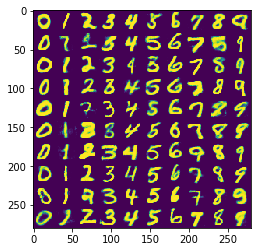

In [11]:
conditions = np.arange(10)
conditions = cvae_trainer.one_hot(conditions)
conditions = np.concatenate([conditions for i in range(10)], axis=0)
logits = trainer.generate_samples(conditions) * 255
image = tf_lib.utils.visualize_images(logits)
plt.imshow(image)